Importing libaries 

In [187]:
import pandas as pd
import datetime as dt
import numpy as np
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler  
from sklearn.ensemble import RandomForestRegressor




In [188]:
pd.set_option("display.max_rows", 30, "display.max_columns", None)

# IMPORT AND CLEANING

We import that dataframe and remove 2020-10 to 2021-04 since we are missing some values, and this data is during Covid so to avoid that skew we removed the data

In [189]:
df = pd.read_csv(Path('Resources\DataforMLtesting.csv'))
df = df[~df['REF_DATE'].isin(['2020-10', '2021-01', '2021-04'])]
df

,Unnamed: 0,REF_DATE,GEO,DGUID,National Occupational Classification,Job vacancy characteristics,Statistics,VALUE,STATUS
0,1233457,2015-04,Newfoundland and Labrador,2016A000210,"Business, finance and administration occupatio...",Full-time,Job vacancies,430.0,D
1,1242071,2015-04,Newfoundland and Labrador,2016A000210,Natural and applied sciences and related occup...,Full-time,Job vacancies,170.0,D
2,1251511,2015-04,Newfoundland and Labrador,2016A000210,Health occupations [3],Full-time,Job vacancies,265.0,D
3,1251514,2015-04,Newfoundland and Labrador,2016A000210,Health occupations [3],Part-time,Job vacancies,260.0,D
4,1257411,2015-04,Newfoundland and Labrador,2016A000210,"Occupations in education, law and social, comm...",Full-time,Job vacancies,130.0,D
...,...,...,...,...,...,...,...,...,...
2961,23746440,2020-01,Nunavut,2016A000262,"Business, finance and administration occupatio...",Full-time,Job vacancies,55.0,D
2962,23755273,2020-01,Nunavut,2016A000262,Natural and applied sciences and related occup...,Full-time,Job vacancies,45.0,D
2963,23755276,2020-01,Nunavut,2016A000262,Natural and applied sciences and related occup...,Part-time,Job vacancies,0.0,A
2964,23792783,2020-01,Nunavut,2016A000262,"Trades, transport and equipment operators and ...",Full-time,Job vacancies,85.0,D


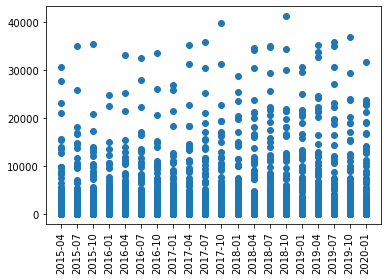

In [190]:
plt.scatter(df.REF_DATE, df.VALUE)
plt.xticks(rotation = 90)
plt.show()

Dropping uneeded columns for encoding, and renaming column names for easier access

In [191]:
df.columns
df = df.drop(["Unnamed: 0","DGUID","Statistics","STATUS"],axis=1)
df.columns.values[2] = "NOC"
df.columns.values[3] = "JOB_CHAR"


In [192]:
df.iloc[:,1:4]

,GEO,NOC,JOB_CHAR
0,Newfoundland and Labrador,"Business, finance and administration occupatio...",Full-time
1,Newfoundland and Labrador,Natural and applied sciences and related occup...,Full-time
2,Newfoundland and Labrador,Health occupations [3],Full-time
3,Newfoundland and Labrador,Health occupations [3],Part-time
4,Newfoundland and Labrador,"Occupations in education, law and social, comm...",Full-time
...,...,...,...
2961,Nunavut,"Business, finance and administration occupatio...",Full-time
2962,Nunavut,Natural and applied sciences and related occup...,Full-time
2963,Nunavut,Natural and applied sciences and related occup...,Part-time
2964,Nunavut,"Trades, transport and equipment operators and ...",Full-time


In [193]:
df["VALUE"] = df["VALUE"].astype(int)

In [194]:
df

,REF_DATE,GEO,NOC,JOB_CHAR,VALUE
0,2015-04,Newfoundland and Labrador,"Business, finance and administration occupatio...",Full-time,430
1,2015-04,Newfoundland and Labrador,Natural and applied sciences and related occup...,Full-time,170
2,2015-04,Newfoundland and Labrador,Health occupations [3],Full-time,265
3,2015-04,Newfoundland and Labrador,Health occupations [3],Part-time,260
4,2015-04,Newfoundland and Labrador,"Occupations in education, law and social, comm...",Full-time,130
...,...,...,...,...,...
2961,2020-01,Nunavut,"Business, finance and administration occupatio...",Full-time,55
2962,2020-01,Nunavut,Natural and applied sciences and related occup...,Full-time,45
2963,2020-01,Nunavut,Natural and applied sciences and related occup...,Part-time,0
2964,2020-01,Nunavut,"Trades, transport and equipment operators and ...",Full-time,85


Encoding Quarters by labels since orignally it is 1 4 7 10, we transform this to 1 2 3 4 Quarters, we also convert Year to INT and drop REF DATE, Formating and sorting as well

In [195]:
LE= LabelEncoder()
df[['YEAR', 'QUARTER']] = df['REF_DATE'].str.split('-', 1, expand=True)
df["QUARTER"]=LE.fit_transform(df["QUARTER"])
df["QUARTER"] += 1
df["YEAR"] = df["YEAR"].astype(int)
# df["QUARTER"] = df["QUARTER"].astype(int)
df = df.drop(columns=["REF_DATE"])


In [196]:
df.sort_values(["YEAR", "QUARTER"], ascending=[True, True], inplace=True)
cols = df.columns.tolist()
cols = cols[-2:] + cols[:-2]
df = df[cols]
df


,YEAR,QUARTER,GEO,NOC,JOB_CHAR,VALUE
0,2015,2,Newfoundland and Labrador,"Business, finance and administration occupatio...",Full-time,430
1,2015,2,Newfoundland and Labrador,Natural and applied sciences and related occup...,Full-time,170
2,2015,2,Newfoundland and Labrador,Health occupations [3],Full-time,265
3,2015,2,Newfoundland and Labrador,Health occupations [3],Part-time,260
4,2015,2,Newfoundland and Labrador,"Occupations in education, law and social, comm...",Full-time,130
...,...,...,...,...,...,...
2961,2020,1,Nunavut,"Business, finance and administration occupatio...",Full-time,55
2962,2020,1,Nunavut,Natural and applied sciences and related occup...,Full-time,45
2963,2020,1,Nunavut,Natural and applied sciences and related occup...,Part-time,0
2964,2020,1,Nunavut,"Trades, transport and equipment operators and ...",Full-time,85


In [197]:
df["QUARTER"].unique()

array([2, 3, 4, 1])

Creating a function to grab previous job vacancy and return np.nan if it does not exist, autoregression 

In [198]:
def prevVacancies(row):

    # There is no previous data for 2015 Quarter 2, therefor it is automatically np.nan
    if (row["YEAR"] == 2015) & (row["QUARTER"] == 2):
        return np.nan

        # If Quarter is 1 then return the previous years Quarter 4 vacancy value IF it exists, if it does not return np.nan 
    elif (row["QUARTER"] == 1): 
        if (df.loc[(df["GEO"] == row["GEO"]) & (df["YEAR"] == (row["YEAR"]-1)) & (df["QUARTER"] == 4) & (df["NOC"] == row["NOC"]) & (df["JOB_CHAR"] == row["JOB_CHAR"])].empty):
            return np.nan
        else:
            return df.loc[(df["GEO"] == row["GEO"]) & (df["YEAR"] == (row["YEAR"]-1)) & (df["QUARTER"] == 4) & (df["NOC"] == row["NOC"]) & (df["JOB_CHAR"] == row["JOB_CHAR"])].iloc[0,5]
            
    else:
        # Returns the previous Quarters value if it is not empty, if it is empty returns np.nan
        if (df.loc[(df["GEO"] == row["GEO"]) & (df["YEAR"] == (row["YEAR"])) & (df["QUARTER"] == (row["QUARTER"]-1)) & (df["NOC"] == row["NOC"]) & (df["JOB_CHAR"] == row["JOB_CHAR"])].empty):
            return np.nan
        else:
            return df.loc[(df["GEO"] == row["GEO"]) & (df["YEAR"] == (row["YEAR"])) & (df["QUARTER"] == (row["QUARTER"]-1)) & (df["NOC"] == row["NOC"]) & (df["JOB_CHAR"] == row["JOB_CHAR"])].iloc[0,5]



Creating a function to join together X_test, Y_test, and Output of machine learning model into a cohesive dataframe to allow us to observe the data easier. Recoded the encoded values. 

In [199]:
def Prediction_Join(Input, Y_Input, Prediction):

    Pred_df = pd.DataFrame(Prediction, columns = ["PREDICTED_VACANCIES"])

    Input.reset_index(inplace=True, drop=True)
    Y_Input.reset_index(inplace=True, drop=True)
    Input = pd.merge(Input,Y_Input,how = 'left',left_index = True, right_index = True)
    Input.rename({'VALUE' : 'CURRENT_VACANCIES'},  axis='columns', inplace=True)
    
    df_out = pd.merge(Input,Pred_df,how = 'left',left_index = True, right_index = True)
    df_out = df_out[['YEAR', 'QUARTER', 'PREVIOUS_VACANCY','CURRENT_VACANCIES', 'PREDICTED_VACANCIES', 'Alberta', 'British Columbia',
        'Manitoba', 'New Brunswick', 'Newfoundland and Labrador',
        'Northwest Territories', 'Nova Scotia', 'Nunavut', 'Ontario',
        'Prince Edward Island', 'Quebec', 'Saskatchewan', 'Yukon',
        'Business, finance and administration occupations [1]',
        'Health occupations [3]', 'Management occupations [0]',
        'Natural and applied sciences and related occupations [2]',
        'Natural resources, agriculture and related production occupations [8]',
        'Occupations in art, culture, recreation and sport [5]',
        'Occupations in education, law and social, community and government services [4]',
        'Occupations in manufacturing and utilities [9]',
        'Sales and service occupations [6]',
        'Trades, transport and equipment operators and related occupations [7]',
        'Full-time', 'Part-time']]
    df_out.sort_values(["YEAR", "QUARTER"], ascending=[True, True], inplace=True)
    df_out["PREDICTED_VACANCIES"] = df_out["PREDICTED_VACANCIES"].astype(int)

    GEO_RECODED = df_out.iloc[:,5:18].idxmax(1)
    NOC_RECODED = df_out.iloc[:,18:28].idxmax(1)
    JOB_CHAR_RECODED = df_out.iloc[:,28:30].idxmax(1)

    df_out = df_out.merge(GEO_RECODED.rename("GEO"), left_index=True, right_index=True)
    df_out = df_out.merge(NOC_RECODED.rename("NOC"), left_index=True, right_index=True)
    df_out = df_out.merge(JOB_CHAR_RECODED.rename("JOB_CHAR"), left_index=True, right_index=True)
    df_out.drop(['Alberta', 'British Columbia',
        'Manitoba', 'New Brunswick', 'Newfoundland and Labrador',
        'Northwest Territories', 'Nova Scotia', 'Nunavut', 'Ontario',
        'Prince Edward Island', 'Quebec', 'Saskatchewan', 'Yukon',
        'Business, finance and administration occupations [1]',
        'Health occupations [3]', 'Management occupations [0]',
        'Natural and applied sciences and related occupations [2]',
        'Natural resources, agriculture and related production occupations [8]',
        'Occupations in art, culture, recreation and sport [5]',
        'Occupations in education, law and social, community and government services [4]',
        'Occupations in manufacturing and utilities [9]',
        'Sales and service occupations [6]',
        'Trades, transport and equipment operators and related occupations [7]',
        'Full-time', 'Part-time'], axis=1, inplace=True)
    df_out = df_out[['YEAR', 'QUARTER', 'GEO', 'NOC', 'JOB_CHAR', 'PREVIOUS_VACANCY', 'CURRENT_VACANCIES',
        'PREDICTED_VACANCIES']]
    
    return df_out

In [200]:
df["PREVIOUS_VACANCY"] = df.apply(prevVacancies, axis=1)
df

,YEAR,QUARTER,GEO,NOC,JOB_CHAR,VALUE,PREVIOUS_VACANCY
0,2015,2,Newfoundland and Labrador,"Business, finance and administration occupatio...",Full-time,430,NaN
1,2015,2,Newfoundland and Labrador,Natural and applied sciences and related occup...,Full-time,170,NaN
2,2015,2,Newfoundland and Labrador,Health occupations [3],Full-time,265,NaN
3,2015,2,Newfoundland and Labrador,Health occupations [3],Part-time,260,NaN
4,2015,2,Newfoundland and Labrador,"Occupations in education, law and social, comm...",Full-time,130,NaN
...,...,...,...,...,...,...,...
2961,2020,1,Nunavut,"Business, finance and administration occupatio...",Full-time,55,45.0
2962,2020,1,Nunavut,Natural and applied sciences and related occup...,Full-time,45,50.0
2963,2020,1,Nunavut,Natural and applied sciences and related occup...,Part-time,0,NaN
2964,2020,1,Nunavut,"Trades, transport and equipment operators and ...",Full-time,85,40.0


In [201]:
TestNOC = "Health occupations [3]"

print( df.loc[(df["GEO"] == "Alberta") & (df["YEAR"] == 2020) & (df["QUARTER"] == 1) & (df["NOC"] == TestNOC) & (df["JOB_CHAR"] == "Full-time")].iloc[0,5] )
print( df.loc[(df["GEO"] == "Alberta") & (df["YEAR"] == 2019) & (df["QUARTER"] == 4) & (df["NOC"] == TestNOC) & (df["JOB_CHAR"] == "Full-time")].iloc[0,5] )


840
690


In [202]:
df.loc[(df["GEO"] == "Alberta") & (df["YEAR"] == 2020) & (df["QUARTER"] == 1) & (df["NOC"] == TestNOC) & (df["JOB_CHAR"] == "Full-time")]

,YEAR,QUARTER,GEO,NOC,JOB_CHAR,VALUE,PREVIOUS_VACANCY
2929,2020,1,Alberta,Health occupations [3],Full-time,840,690.0


Removing rows that do not have previous Vacancy value, only a loss of 2966 -> 2456 rows 

In [203]:
df = df[df.PREVIOUS_VACANCY.notna()]
df["PREVIOUS_VACANCY"] = df["PREVIOUS_VACANCY"].astype(int)


C:\Users\Alec\Downloads\Anaconda\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


# ENCODING 

Here we do label encoding on columns GEO, NOC, JOB_CHAR then we do OneHotEncoding on each of the columns and merge them and remove the original column. Also reset the index since we removed rows, the index numbers will not match and when we merge we will lose data going to 2002 rows. 

In [204]:
df

,YEAR,QUARTER,GEO,NOC,JOB_CHAR,VALUE,PREVIOUS_VACANCY
133,2015,3,Newfoundland and Labrador,"Business, finance and administration occupatio...",Full-time,330,430
134,2015,3,Newfoundland and Labrador,Natural and applied sciences and related occup...,Full-time,225,170
135,2015,3,Newfoundland and Labrador,Health occupations [3],Full-time,315,265
136,2015,3,Newfoundland and Labrador,Health occupations [3],Part-time,350,260
137,2015,3,Newfoundland and Labrador,"Occupations in education, law and social, comm...",Full-time,260,130
...,...,...,...,...,...,...,...
2959,2020,1,Yukon,"Trades, transport and equipment operators and ...",Full-time,60,35
2960,2020,1,Nunavut,Management occupations [0],Full-time,65,35
2961,2020,1,Nunavut,"Business, finance and administration occupatio...",Full-time,55,45
2962,2020,1,Nunavut,Natural and applied sciences and related occup...,Full-time,45,50


Creating 3 dataframes to store the label encoding order

In [205]:
a = df["GEO"].unique()
b = [ 4,  9,  6,  3, 10,  8,  2, 11,  0,  1, 12,  7,  5]

GEO_LABEL_df = pd.DataFrame(a, columns = ["GEO"])
GEO_LABEL_df.index = b
GEO_LABEL_df.sort_index(inplace=True)
GEO_LABEL_df["GEO"].values


array(['Alberta', 'British Columbia', 'Manitoba', 'New Brunswick',
       'Newfoundland and Labrador', 'Northwest Territories',
       'Nova Scotia', 'Nunavut', 'Ontario', 'Prince Edward Island',
       'Quebec', 'Saskatchewan', 'Yukon'], dtype=object)

In [206]:
c = df["NOC"].unique()
d = [0, 3, 1, 6, 8, 9, 7, 2, 5, 4]

NOC_LABEL_df = pd.DataFrame(c,columns = ["NOC"])
NOC_LABEL_df.index = d
NOC_LABEL_df.sort_index(inplace=True)
NOC_LABEL_df

,NOC
0,"Business, finance and administration occupatio..."
1,Health occupations [3]
2,Management occupations [0]
3,Natural and applied sciences and related occup...
4,"Natural resources, agriculture and related pro..."
5,"Occupations in art, culture, recreation and sp..."
6,"Occupations in education, law and social, comm..."
7,Occupations in manufacturing and utilities [9]
8,Sales and service occupations [6]
9,"Trades, transport and equipment operators and ..."


In [207]:
e = df["JOB_CHAR"].unique()
f = [0, 1]

JOB_CHAR_LABEL_df = pd.DataFrame(e,columns = ["JOB_CHAR"])
JOB_CHAR_LABEL_df.index = f
JOB_CHAR_LABEL_df.sort_index(inplace=True)
JOB_CHAR_LABEL_df

,JOB_CHAR
0,Full-time
1,Part-time


In [208]:
for column in df.iloc[:,2:5]:
    
    df[column]=LE.fit_transform(df[column]) 
    print( df[column].unique())

df.reset_index(inplace = True, drop=True)

[ 4  9  6  3 10  8  2 11  0  1 12  7  5]
[0 3 1 6 8 9 7 2 5 4]
[0 1]


C:\Users\Alec\Downloads\Anaconda\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [209]:
enc = OneHotEncoder(sparse=False)
encode_df = pd.DataFrame(enc.fit_transform(df.GEO.values.reshape(-1,1)))
encode_df.columns = GEO_LABEL_df["GEO"].values
encode_df

,Alberta,British Columbia,Manitoba,New Brunswick,Newfoundland and Labrador,Northwest Territories,Nova Scotia,Nunavut,Ontario,Prince Edward Island,Quebec,Saskatchewan,Yukon
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2451,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2452,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2453,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2454,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [210]:
encode_df2 = pd.DataFrame(enc.fit_transform(df.NOC.values.reshape(-1,1)))
encode_df2.columns = NOC_LABEL_df["NOC"].values
encode_df2

,"Business, finance and administration occupations [1]",Health occupations [3],Management occupations [0],Natural and applied sciences and related occupations [2],"Natural resources, agriculture and related production occupations [8]","Occupations in art, culture, recreation and sport [5]","Occupations in education, law and social, community and government services [4]",Occupations in manufacturing and utilities [9],Sales and service occupations [6],"Trades, transport and equipment operators and related occupations [7]"
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2451,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2452,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2453,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2454,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [211]:
encode_df3 = pd.DataFrame(enc.fit_transform(df.JOB_CHAR.values.reshape(-1,1)))
encode_df3.columns = JOB_CHAR_LABEL_df["JOB_CHAR"].values
encode_df3

,Full-time,Part-time
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,0.0,1.0
4,1.0,0.0
...,...,...
2451,1.0,0.0
2452,1.0,0.0
2453,1.0,0.0
2454,1.0,0.0


In [212]:
df = df.merge(encode_df,left_index=True,right_index=True).drop("GEO",1)
df = df.merge(encode_df2,left_index=True,right_index=True).drop("NOC",1)
df = df.merge(encode_df3,left_index=True,right_index=True).drop("JOB_CHAR",1)
df

C:\Users\Alec\Downloads\Anaconda\envs\mlenv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.
C:\Users\Alec\Downloads\Anaconda\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  
C:\Users\Alec\Downloads\Anaconda\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,YEAR,QUARTER,VALUE,PREVIOUS_VACANCY,Alberta,British Columbia,Manitoba,New Brunswick,Newfoundland and Labrador,Northwest Territories,Nova Scotia,Nunavut,Ontario,Prince Edward Island,Quebec,Saskatchewan,Yukon,"Business, finance and administration occupations [1]",Health occupations [3],Management occupations [0],Natural and applied sciences and related occupations [2],"Natural resources, agriculture and related production occupations [8]","Occupations in art, culture, recreation and sport [5]","Occupations in education, law and social, community and government services [4]",Occupations in manufacturing and utilities [9],Sales and service occupations [6],"Trades, transport and equipment operators and related occupations [7]",Full-time,Part-time
0,2015,3,330,430,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2015,3,225,170,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2015,3,315,265,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2015,3,350,260,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2015,3,260,130,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2451,2020,1,60,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2452,2020,1,65,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2453,2020,1,55,45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2454,2020,1,45,50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


Convert all values to int 

In [213]:
for c in (df.iloc[:,2:29].columns):
    df[c] = df[c].astype(int)


# SPLITTING DATA FOR ML MODEL


In [214]:
cols = df.columns.tolist()
cols = cols[2:] + cols[:2]
df = df[cols]
df


,VALUE,PREVIOUS_VACANCY,Alberta,British Columbia,Manitoba,New Brunswick,Newfoundland and Labrador,Northwest Territories,Nova Scotia,Nunavut,Ontario,Prince Edward Island,Quebec,Saskatchewan,Yukon,"Business, finance and administration occupations [1]",Health occupations [3],Management occupations [0],Natural and applied sciences and related occupations [2],"Natural resources, agriculture and related production occupations [8]","Occupations in art, culture, recreation and sport [5]","Occupations in education, law and social, community and government services [4]",Occupations in manufacturing and utilities [9],Sales and service occupations [6],"Trades, transport and equipment operators and related occupations [7]",Full-time,Part-time,YEAR,QUARTER
0,330,430,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,2015,3
1,225,170,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,2015,3
2,315,265,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,2015,3
3,350,260,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,2015,3
4,260,130,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,2015,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2451,60,35,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,2020,1
2452,65,35,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,2020,1
2453,55,45,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,2020,1
2454,45,50,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,2020,1


In [215]:
Y = df.iloc[:,0]
Y

0       330
1       225
2       315
3       350
4       260
       ... 
2451     60
2452     65
2453     55
2454     45
2455     85
Name: VALUE, Length: 2456, dtype: int32

In [216]:
X = df.iloc[:,1:29]
cols = X.columns.tolist()
cols = cols[-2:] + cols[:-2]
X = X[cols]
X

,YEAR,QUARTER,PREVIOUS_VACANCY,Alberta,British Columbia,Manitoba,New Brunswick,Newfoundland and Labrador,Northwest Territories,Nova Scotia,Nunavut,Ontario,Prince Edward Island,Quebec,Saskatchewan,Yukon,"Business, finance and administration occupations [1]",Health occupations [3],Management occupations [0],Natural and applied sciences and related occupations [2],"Natural resources, agriculture and related production occupations [8]","Occupations in art, culture, recreation and sport [5]","Occupations in education, law and social, community and government services [4]",Occupations in manufacturing and utilities [9],Sales and service occupations [6],"Trades, transport and equipment operators and related occupations [7]",Full-time,Part-time
0,2015,3,430,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,2015,3,170,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
2,2015,3,265,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
3,2015,3,260,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
4,2015,3,130,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2451,2020,1,35,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0
2452,2020,1,35,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2453,2020,1,45,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2454,2020,1,50,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


In [217]:
X.shape, Y.shape

((2456, 28), (2456,))

In [218]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
X_train.shape, Y_train.shape

((1964, 28), (1964,))

In [219]:
X_test.shape, Y_test.shape

((492, 28), (492,))

# LINEAR REGRESSION MODEL


Defines the regrssion model

In [220]:
model = linear_model.LinearRegression()

Build training model

In [221]:
model.fit(X_train, Y_train)

LinearRegression()

In [222]:
Y_pred = model.predict(X_test)
Y_pred_train = model.predict(X_train)

In [223]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_test, Y_pred))
print('Coefficient of determination Testing (R^2): %.2f'
      % r2_score(Y_test, Y_pred))

print('Coefficient of determination Training (R^2): %.2f'
      % r2_score(Y_train, Y_pred_train))

Coefficients: [ 2.59567919e+01 -6.47967765e+01  9.52645474e-01 -2.13195426e+00
  2.63937166e+02 -3.21073128e+01 -7.50076784e+01 -1.13568114e+02
 -2.12949782e+02 -4.38590152e+01 -2.09321520e+02  4.97138417e+02
 -1.54140288e+02  3.90011544e+02 -9.51519367e+01 -2.12849525e+02
  7.25840639e+01  3.18254785e+01 -5.16597272e+01  6.70614847e+01
 -2.37053618e+02 -1.72133167e+02 -1.59908306e-01 -1.10314536e+02
  2.65304189e+02  1.34545739e+02  1.08602772e+02 -1.08602772e+02]
Intercept: -52188.772956310815
Mean squared error (MSE): 1252269.04
Coefficient of determination Testing (R^2): 0.97
Coefficient of determination Training (R^2): 0.96


In [224]:
X_test.shape, Y_pred.shape

((492, 28), (492,))

In [225]:
df_out = Prediction_Join(X_test, Y_test, Y_pred)

In [226]:
df_out

,YEAR,QUARTER,GEO,NOC,JOB_CHAR,PREVIOUS_VACANCY,CURRENT_VACANCIES,PREDICTED_VACANCIES
43,2015,3,Quebec,"Trades, transport and equipment operators and ...",Full-time,8250,6755,8412
47,2015,3,Newfoundland and Labrador,"Occupations in education, law and social, comm...",Full-time,130,260,38
84,2015,3,Manitoba,"Occupations in education, law and social, comm...",Part-time,425,615,183
140,2015,3,Newfoundland and Labrador,Health occupations [3],Full-time,265,315,199
153,2015,3,Alberta,Health occupations [3],Part-time,1445,630,1217
...,...,...,...,...,...,...,...,...
368,2020,1,Nova Scotia,Sales and service occupations [6],Full-time,2030,2110,2443
381,2020,1,Quebec,"Business, finance and administration occupatio...",Part-time,2245,2960,2671
383,2020,1,Alberta,"Natural resources, agriculture and related pro...",Full-time,1495,2005,1472
404,2020,1,British Columbia,"Occupations in education, law and social, comm...",Part-time,2850,3515,3049


In [227]:
df_out[df_out.PREDICTED_VACANCIES < 0]

,YEAR,QUARTER,GEO,NOC,JOB_CHAR,PREVIOUS_VACANCY,CURRENT_VACANCIES,PREDICTED_VACANCIES
180,2015,4,Saskatchewan,"Occupations in art, culture, recreation and sp...",Part-time,55,30,-468
52,2016,3,Saskatchewan,"Business, finance and administration occupatio...",Part-time,100,185,-90
235,2016,3,Manitoba,"Business, finance and administration occupatio...",Part-time,95,285,-31
61,2016,4,Saskatchewan,Health occupations [3],Part-time,225,215,-76
70,2016,4,New Brunswick,Health occupations [3],Part-time,260,245,-23
...,...,...,...,...,...,...,...,...
122,2019,3,New Brunswick,"Occupations in education, law and social, comm...",Part-time,165,235,-2
195,2019,3,Northwest Territories,Management occupations [0],Full-time,40,70,-94
330,2019,4,Newfoundland and Labrador,"Business, finance and administration occupatio...",Part-time,70,110,-124
369,2019,4,New Brunswick,"Business, finance and administration occupatio...",Part-time,65,210,-90


In [228]:
df_out.columns.to_list

<bound method IndexOpsMixin.tolist of Index(['YEAR', 'QUARTER', 'GEO', 'NOC', 'JOB_CHAR', 'PREVIOUS_VACANCY',
       'CURRENT_VACANCIES', 'PREDICTED_VACANCIES'],
      dtype='object')>

C:\Users\Alec\Downloads\Anaconda\envs\mlenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='VALUE'>

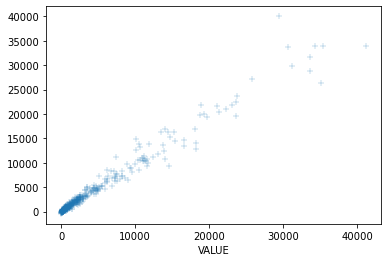

In [229]:
sns.scatterplot(Y_test, Y_pred, marker="+", alpha=0.5)

# MLP REGRESSOR MODEL


In [230]:
model_MLP = MLPRegressor(
    hidden_layer_sizes=(15,15),  activation='relu', solver='adam', alpha=0.001, batch_size='auto',
    learning_rate='constant', learning_rate_init=0.01, power_t=0.5, max_iter=100, shuffle=True,
    random_state=1, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
    early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)


In [231]:
X_train_MLP, X_test_MLP, Y_train_MLP, Y_test_MLP = train_test_split(X, Y, test_size=0.2)
X_train_MLP.shape, Y_train_MLP.shape


((1964, 28), (1964,))

In [232]:
model_MLP.fit(X_train_MLP,Y_train_MLP)

MLPRegressor(alpha=0.001, hidden_layer_sizes=(15, 15), learning_rate_init=0.01,
             max_iter=100, random_state=1)

In [233]:
Y_pred_MLP = model.predict(X_test_MLP)

In [234]:
print(model_MLP.n_layers_)
print('Accuracy training : {:.3f}'.format(model_MLP.score(X_train_MLP, Y_train_MLP)))
print('Accuracy testing : {:.3f}'.format(model_MLP.score(X_test_MLP, Y_test_MLP)))
print('Coefficient of determination Testing (R^2): %.2f'
      % r2_score(Y_test_MLP, Y_pred_MLP))
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_test_MLP, Y_pred_MLP))

4
Accuracy training : 0.964
Accuracy testing : 0.960
Coefficient of determination Testing (R^2): 0.96
Mean squared error (MSE): 1320889.99


C:\Users\Alec\Downloads\Anaconda\envs\mlenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='VALUE'>

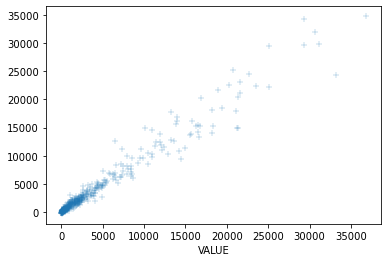

In [235]:
sns.scatterplot(Y_test_MLP, Y_pred_MLP, marker="+", alpha=0.5)

In [236]:
test = Prediction_Join(X_test_MLP, Y_test_MLP, Y_pred_MLP)

In [237]:
test

,YEAR,QUARTER,GEO,NOC,JOB_CHAR,PREVIOUS_VACANCY,CURRENT_VACANCIES,PREDICTED_VACANCIES
14,2015,3,Prince Edward Island,Natural and applied sciences and related occup...,Full-time,70,45,7
15,2015,3,Alberta,Sales and service occupations [6],Full-time,20940,16900,20239
53,2015,3,Nova Scotia,Occupations in manufacturing and utilities [9],Full-time,460,415,312
60,2015,3,Alberta,"Trades, transport and equipment operators and ...",Part-time,370,900,296
83,2015,3,New Brunswick,Health occupations [3],Full-time,220,135,194
...,...,...,...,...,...,...,...,...
401,2020,1,Nova Scotia,"Business, finance and administration occupatio...",Part-time,350,210,432
403,2020,1,New Brunswick,Sales and service occupations [6],Part-time,1485,1210,1675
409,2020,1,Newfoundland and Labrador,"Occupations in education, law and social, comm...",Part-time,80,75,33
439,2020,1,Nova Scotia,Sales and service occupations [6],Part-time,2250,1465,2435


# RANDOM FOREST REGRESSOR 

In [238]:
# Saving feature names for later use
feature_list = list(X.columns)


In [239]:
train_features, test_features, train_labels, test_labels = train_test_split(X, Y, test_size = 0.25, random_state = 42)

In [240]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (1842, 28)
Training Labels Shape: (1842,)
Testing Features Shape: (614, 28)
Testing Labels Shape: (614,)


In [241]:
# The baseline predictions are the historical averages
baseline_preds = test_features.iloc[:, feature_list.index('PREVIOUS_VACANCY')]
# Baseline errors, and display average baseline error
baseline_errors = abs(baseline_preds - test_labels)
print('Average baseline error: ', round(np.mean(baseline_errors), 2))


Average baseline error:  530.0


In [242]:
# Instantiate model with 1000 decision trees
model_RF = RandomForestRegressor(n_estimators = 1000, random_state = 42)

# Train the model on training data
model_RF.fit(train_features, train_labels)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [243]:
# Use the forest's predict method on the test data
predictions = model_RF.predict(test_features)

# Calculate the absolute errors
errors = abs(predictions - test_labels)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))
print(model_RF.score)
print('Accuracy testing : {:.3f}'.format(model_RF.score(test_features, test_labels)))
print('Coefficient of determination Testing (R^2): %.2f'
      % r2_score(test_labels, predictions))
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(test_labels, predictions))

Mean Absolute Error: 462.68
<bound method RegressorMixin.score of RandomForestRegressor(n_estimators=1000, random_state=42)>
Accuracy testing : 0.978
Coefficient of determination Testing (R^2): 0.98
Mean squared error (MSE): 840647.89


C:\Users\Alec\Downloads\Anaconda\envs\mlenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='VALUE'>

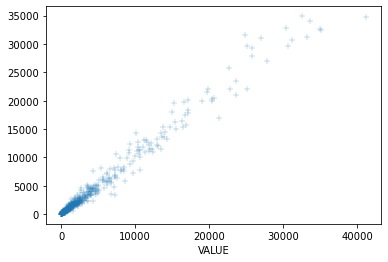

In [244]:
sns.scatterplot(test_labels, predictions, marker="+", alpha=0.5)